# Analysis of a plane frame

Consider a beam with the length 9.0 m. The beam is simply supported and loaded
by a point load $P=10000 N$ applied at a point 3.0 m from the left support. The
corresponding computational model has six degrees of freedom and consists of two
beam elements with four degrees of freedom. The beam has Young’s modulus $E=210 GPa$ and moment of inertia $I=2510\times 10^{−8} m^4$.
<div>
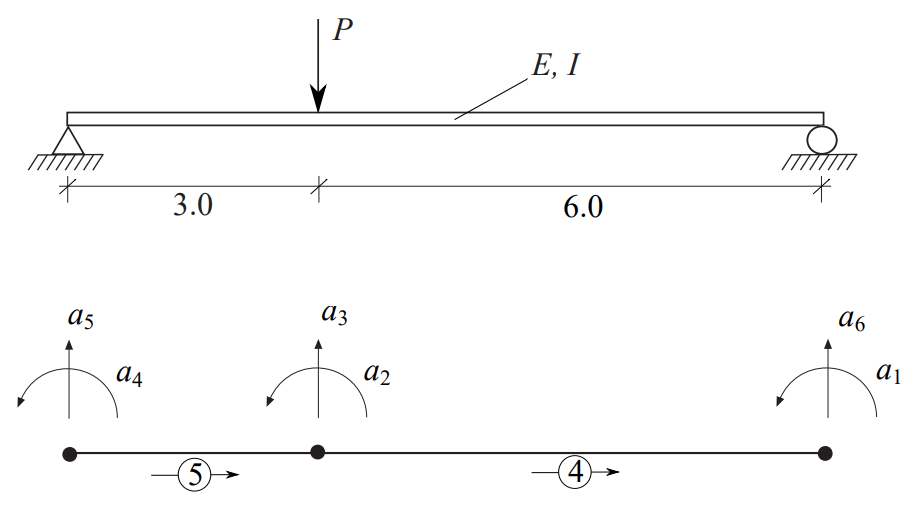
</div>

Install CALFEM (if required)

In [2]:
from importlib.util import find_spec

import sys

sys.path.prepend(r"C:\Users\Jonas Lindemann\Development\calfem-python")

if find_spec("calfem.core") is None:
    !pip install calfem-python
else:
    print("CALFEM already installed.")

AttributeError: 'list' object has no attribute 'prepend'

Import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import calfem.core as cfc
import calfem.utils as cfu
import calfem.vis_mpl as cfv

Define topology

In [3]:
edof = np.array([
     [1, 2, 3, 4], 
     [3, 4, 5, 6]
])

Setup stiffness matrix K and load vector f

In [4]:
K = np.array(np.zeros((6, 6)))
f = np.array(np.zeros((6, 1)))
f[2] = -10e3

Setup element stiffness and element load matrices

In [5]:
E = 210e9
I = 2510e-8

ep = np.array([E, I])
ex1 = np.array([0, 3])
ex2 = np.array([3, 9])
eq1 = np.array([0])
eq2 = np.array([0])

Ke1 = cfc.beam1e(ex1, ep)
Ke2 = cfc.beam1e(ex2, ep)

Assemble Ke into K

In [6]:
K = cfc.assem(edof[0, :], K, Ke1)
K = cfc.assem(edof[1, :], K, Ke2)

Solve the system of equations and compute reactions

In [7]:
bc = np.array([1, 5])
a, r = cfc.solveq(K, f, bc)

cfu.disp_array(a, ["a"])
cfu.disp_array(r, ["r"])

a
0.0000e+00
-9.4859e-03
-2.2766e-02
-3.7943e-03
0.0000e+00
7.5887e-03


r
6.6667e+03
-3.6380e-12
7.2760e-12
-1.0914e-11
3.3333e+03
0.0000e+00


Section forces

In [8]:
ed = cfc.extract_ed(edof, a)

es1, ed1, ec1 = cfc.beam1s(ex1, ep, ed[0, :], eq1, nep=4)
es2, ed2, ec2 = cfc.beam1s(ex2, ep, ed[1, :], eq2, nep=7)

cfu.disp_h2("es1")
cfu.disp_array(es1, ["V1", "M1"])
cfu.disp_h2("ed1")
cfu.disp_array(ed1, ["v1"])
cfu.disp_h2("ec1")
cfu.disp_array(ec1, ["x1"])
cfu.disp_h2("es2")
cfu.disp_array(es2, ["V2", "M2"])
cfu.disp_h2("ed2")
cfu.disp_array(ed2, ["v2"])
cfu.disp_h2("ec2")
cfu.disp_array(ec2, ["x2"])

V1,M1
-6.6667e+03,9.1437e-12
-6.6667e+03,6.6667e+03
-6.6667e+03,1.3333e+04
-6.6667e+03,2.0000e+04


v1
0.0000e+00
-9.2751e-03
-1.7285e-02
-2.2766e-02


x1
0.0000e+00
1.0000e+00
2.0000e+00
3.0000e+00


V2,M2
3.3333e+03,2.0000e+04
3.3333e+03,1.6667e+04
3.3333e+03,1.3333e+04
3.3333e+03,1.0000e+04
3.3333e+03,6.6667e+03
3.3333e+03,3.3333e+03
3.3333e+03,4.5719e-12


v2
-2.2766e-02
-2.4769e-02
-2.3609e-02
-1.9920e-02
-1.4334e-02
-7.4833e-03
6.9389e-18


x2
0.0000e+00
1.0000e+00
2.0000e+00
3.0000e+00
4.0000e+00
5.0000e+00
6.0000e+00


Draw deformed frame

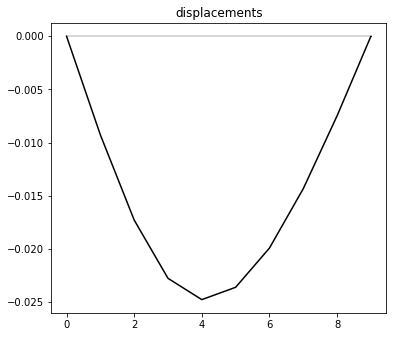

In [9]:
cfv.figure(1)
plt.plot([0, 9], [0, 0], color=(0.8, 0.8, 0.8))
plt.plot(
    np.concatenate(([0], ec1[:, 0], 3 + ec2[:, 0], [9]), 0),
    np.concatenate(([0], ed1[:, 0], ed2[:, 0], [0]), 0),
    color=(0.0, 0.0, 0.0),
)
cfv.title("displacements")

Draw normal force diagram

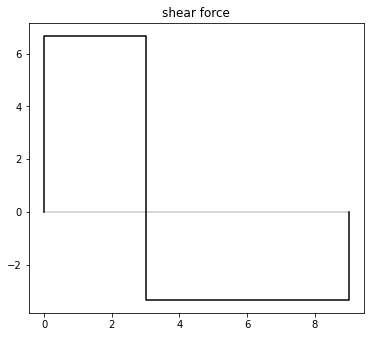

In [10]:
cfv.figure(2)
plt.plot([0, 9], [0, 0], color=(0.8, 0.8, 0.8))
plt.plot(
    np.concatenate(([0], ec1[:, 0], 3 + ec2[:, 0], [9]), 0),
    -np.concatenate(([0], es1[:, 0], es2[:, 0], [0]), 0) / 1000,
    color=(0.0, 0.0, 0.0),
)
cfv.title("shear force")

Draw shear force diagram

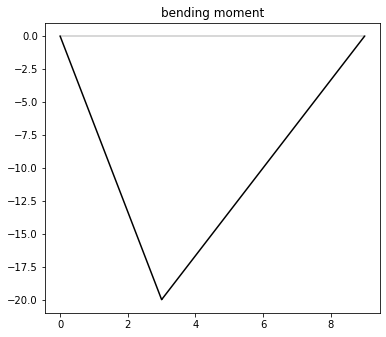

In [11]:
cfv.figure(3)
plt.plot([0, 9], [0, 0], color=(0.8, 0.8, 0.8))
plt.plot(
    np.concatenate(([0], ec1[:, 0], 3 + ec2[:, 0], [9]), 0),
    -np.concatenate(([0], es1[:, 1], es2[:, 1], [0]), 0) / 1000,
    color=(0.0, 0.0, 0.0),
)
cfv.title("bending moment")